
# **Predicción de Alzheimer usando ML**

- **José Carlos Espinosa Martinez**
- **Montserrat Rivas Ortega**
- **Saul Rodas Bautista**


## Introducción
Este proyecto tiene como objetivo desarrollar un modelo de aprendizaje automático para predecir la presencia de Alzheimer en pacientes, utilizando datos clínicos y biomarcadores relevantes. La detección temprana de esta enfermedad es crucial para proporcionar intervenciones oportunas y mejorar la calidad de vida de los pacientes.

### Métodos Utilizados
Para la predicción del Alzheimer, se emplean diversas técnicas de aprendizaje automático, incluyendo:
Además, se aplican técnicas de preprocesamiento como la normalización de datos, reducción de dimensionalidad y selección de características.

### Datos
El conjunto de datos utilizado en este proyecto proviene de fuentes médicas reconocidas, incluyendo:
- **Datos clínicos y demográficos** como edad, género, historial familiar y pruebas cognitivas.
- **Resultados de pruebas neuropsicológicas** para evaluar la función cognitiva de los pacientes.

### Resultados Esperados
Se espera que el modelo desarrollado pueda:
- Proporcionar interpretaciones de los factores más relevantes en la predicción de la enfermedad.
- Servir como una herramienta de apoyo para médicos en el diagnóstico temprano.

## Carga de Librerías y Configuración de Pandas

En esta celda, se importan las bibliotecas necesarias para el análisis de datos, preprocesamiento, modelado y evaluación de modelos de Machine Learning:

### 🔹 Bibliotecas de manipulación y visualización de datos:
- **`pandas`**: Manipulación y análisis de datos.
- **`numpy`**: Cálculo numérico y manejo de arrays.
- **`matplotlib.pyplot` y `seaborn`**: Visualización de datos.

### 🔹 Preprocesamiento y división de datos:
- **`train_test_split`**: División del conjunto de datos en entrenamiento y prueba.
- **`MinMaxScaler` y `StandardScaler`**: Normalización y estandarización de datos.

### 🔹 Evaluación de modelos:
- **`classification_report`**: Genera métricas de clasificación.

### 🔹 Modelos de Machine Learning:
- **`DecisionTreeClassifier`**: Árbol de decisión.
- **`RandomForestClassifier`**: Bosques aleatorios.
- **`KNeighborsClassifier`**: k-Vecinos más cercanos.
- **`LogisticRegression`**: Regresión logística.
- **`SVC`**: Máquina de soporte vectorial.

### 🔹 Optimización de hiperparámetros:
- **`GridSearchCV`**: Búsqueda de hiperparámetros óptimos.


In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)

## Dataset y sus valores estadisticos

Este análisis inicial nos permite detectar valores atípicos, distribuciones y posibles problemas en los datos antes de proceder con el preprocesamiento y modelado.

In [249]:
#Carga del dataset
df = pd.read_csv('Datasets/alzheimers_disease_data.csv')
df.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [251]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [252]:
sum(df.duplicated()) #Verificamos si hay duplicados

0

In [253]:
df.DoctorInCharge.value_counts() #Contamos los valores de la columna DoctorInCharge

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

In [254]:
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [255]:
#Identificamos las columnas numéricas: columnas que tienen más de 10 valores únicos
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

print(numerical_columns)

['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']


In [256]:
# Identificamos las columnas categóricas: columnas que tienen menos de 10 valores únicos
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

print(categorical_columns)

['BehavioralProblems', 'CardiovascularDisease', 'Confusion', 'Depression', 'Diabetes', 'DifficultyCompletingTasks', 'Disorientation', 'EducationLevel', 'Ethnicity', 'FamilyHistoryAlzheimers', 'Forgetfulness', 'Gender', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'PersonalityChanges', 'Smoking']


## Preprocesamiento de Datos: Identificación de Correlaciones y Escalado
Identificación de relaciones entre variables como la transformación de los datos mediante normalización y estandarización.

### Correlaciones

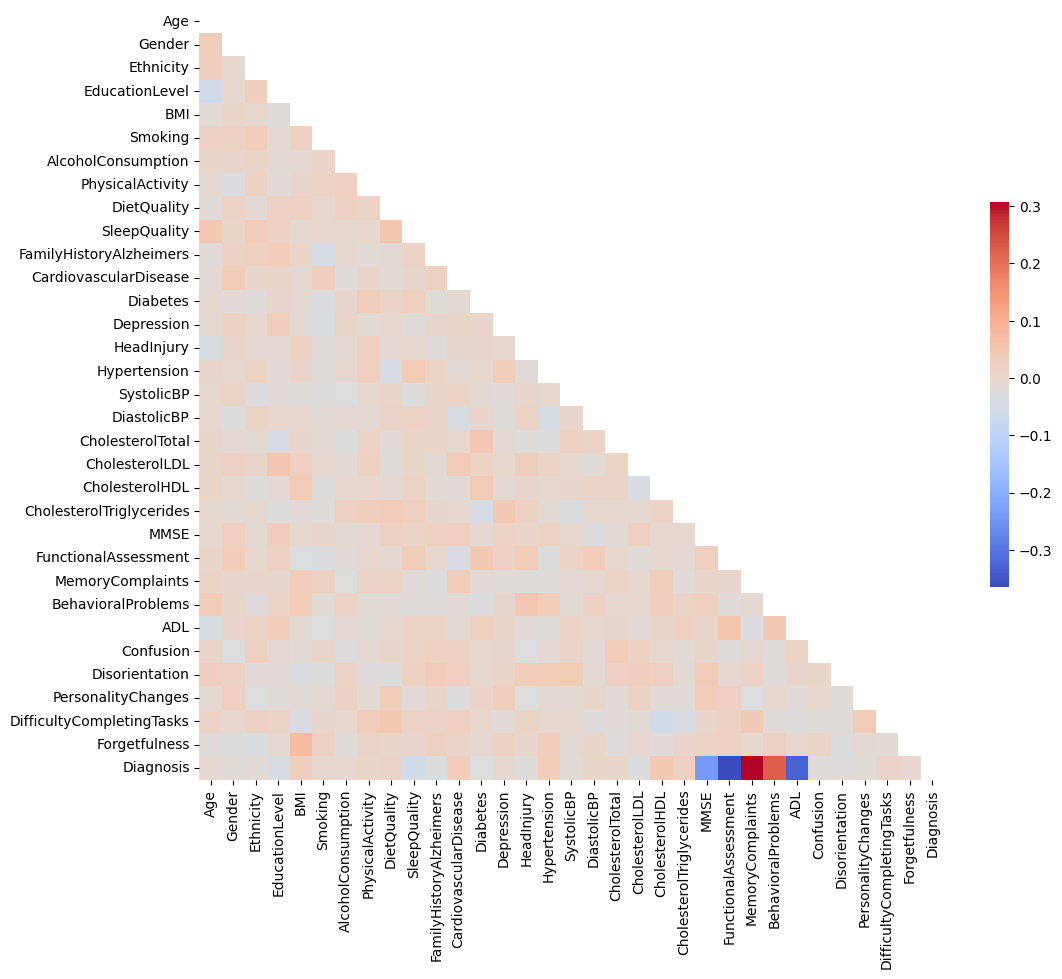

In [257]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) #Creamos una máscara para la matriz triangular superior

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

### Outliers

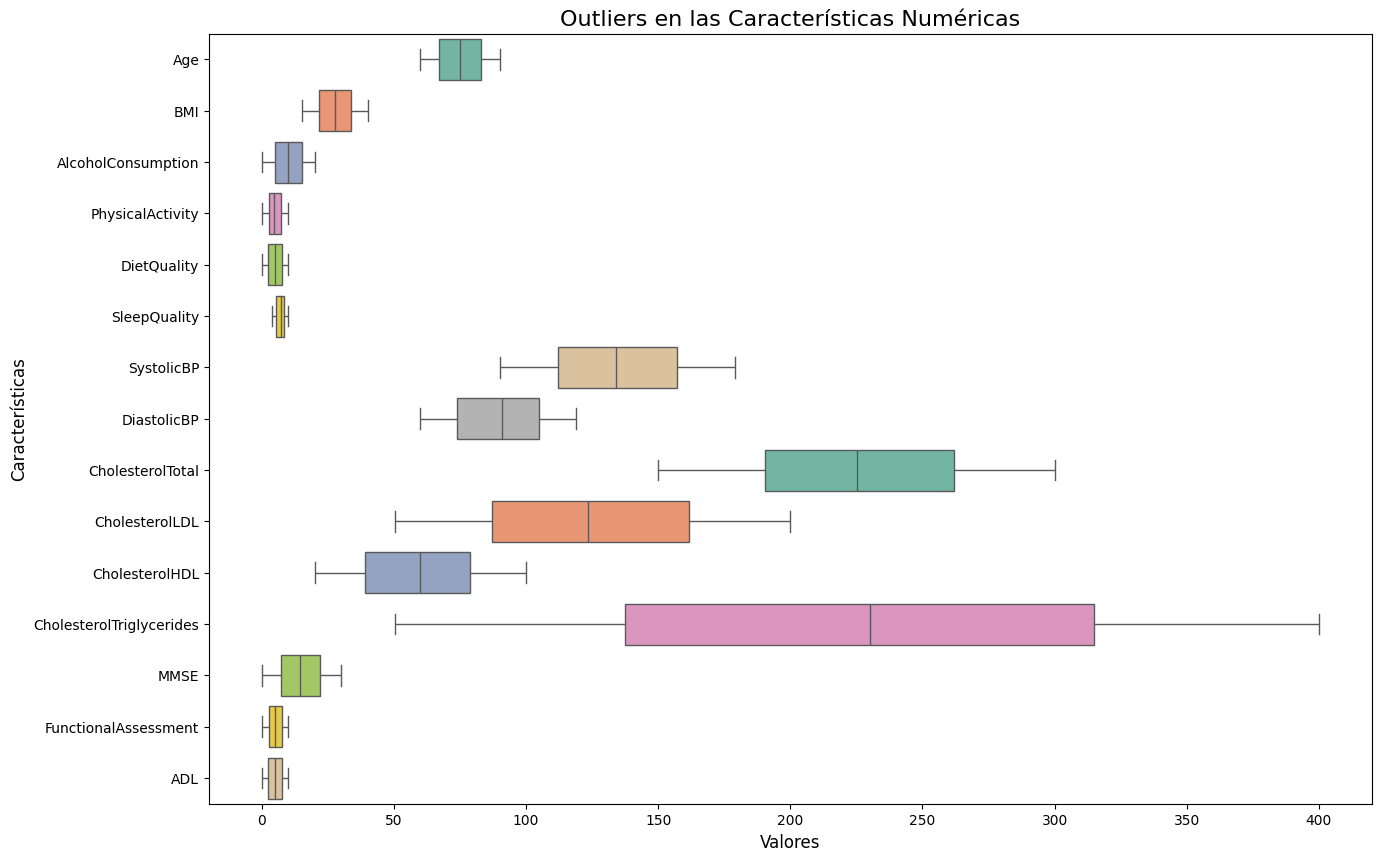

In [258]:
# Graficamos los outliers de las características numéricas
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns], orient='h', palette='Set2')
plt.title('Outliers en las Características Numéricas', fontsize=16)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.show()

### Escalado de datos

Aplicamos:
- **normalizacion** para nuestros valores que tienen valores dispersos en diferentes escalas.
- **estandarizacion** para valores con distribucion normal.

In [259]:
#Normalizamos las columnas numéricas
minmax_scaler = MinMaxScaler()
df[numerical_columns] = minmax_scaler.fit_transform(df[numerical_columns])

#Estandarizamos las columnas numéricas
standard_scaler = StandardScaler()
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,0,0,1,1,0,0,0.298159,-1.014750,0.403677,-1.572661,-1.114429,-0.648199,0.779037,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,0,0,0,0,0,0,-0.742572,-1.469595,0.140248,1.593119,0.845730,0.650721,0.680297,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,1,0,0,0,0,0,-1.359301,1.486898,1.386812,0.668569,0.445615,-1.418585,-0.859222,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,0.760833,0,0,0,0,0,0,-0.626935,1.430043,-1.542715,-1.360103,0.388780,0.483468,-0.088723,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,0,0,0,0,0,0,-1.552029,1.543754,0.291653,-0.725756,-0.111924,0.617060,-0.143712,0.333665,0,0,-1.684679,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,-1.547463,0,0,1,1.589030,0,-1.472807,-0.304649,0.537127,0.274767,0,0,0,0,0,0,-0.472753,0.634063,1.299701,-0.679609,0.063957,0.061185,-1.574000,-1.674022,0,0,-0.166194,1,0,0,0,0,1
2145,0.010147,0,0,2,-1.357833,0,1.516149,-1.246106,-0.718090,0.853112,0,0,0,0,0,0,0.683615,0.918342,-0.912555,-0.667149,1.477761,1.370158,-0.963527,1.247350,0,1,1.431627,0,0,0,0,0,1
2146,0.232663,0,0,1,-1.687864,0,-0.945836,1.738405,1.075131,-0.726886,0,0,0,0,0,0,-0.742572,1.600609,0.278072,0.736484,1.738352,0.652402,0.261971,-1.074634,0,0,0.018099,0,0,0,0,0,1
2147,0.343921,1,3,1,-1.712334,0,-0.237109,0.502036,-1.282402,0.721313,0,1,0,0,0,0,-1.205119,0.349785,0.399688,-1.657260,0.943104,-0.814293,-1.245437,0.032446,0,0,-0.406078,0,0,0,0,1,1


### Random Forest Feature Selection

/tmp/ipykernel_17563/56121788.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


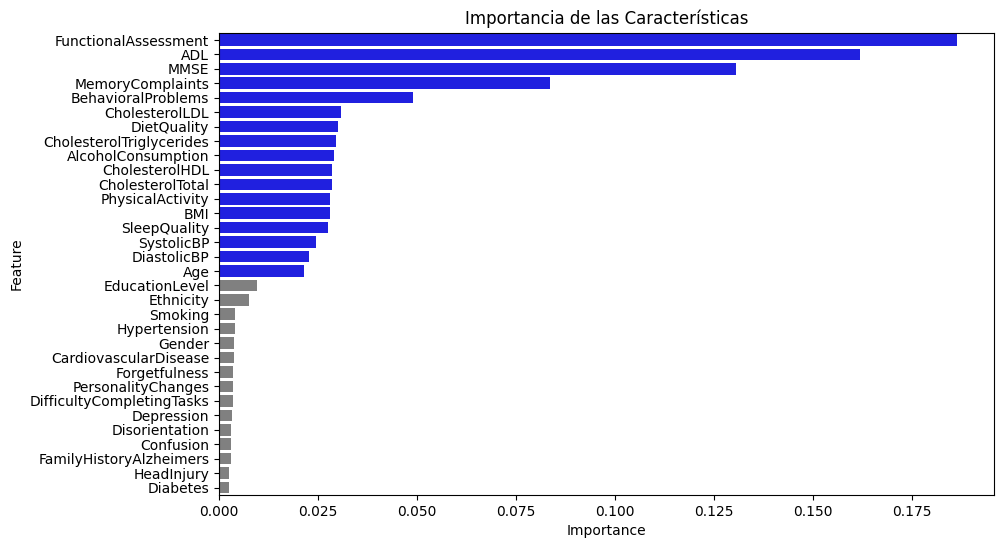

In [260]:
# Entrenamos el modelo con el dataset completo
rf_temp = RandomForestClassifier(random_state=42, n_estimators=100)
rf_temp.fit(df.drop('Diagnosis', axis=1), df['Diagnosis'])

# Obtenemos la importancia de las características
feature_importances = pd.DataFrame({'Feature': df.drop('Diagnosis', axis=1).columns, 'Importance': rf_temp.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Graficamos las características seleccionadas con un color diferente
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importances, 
    palette=['blue' if importance > 0.01 else 'gray' for importance in feature_importances['Importance']]
)
plt.title('Importancia de las Características')
plt.show()


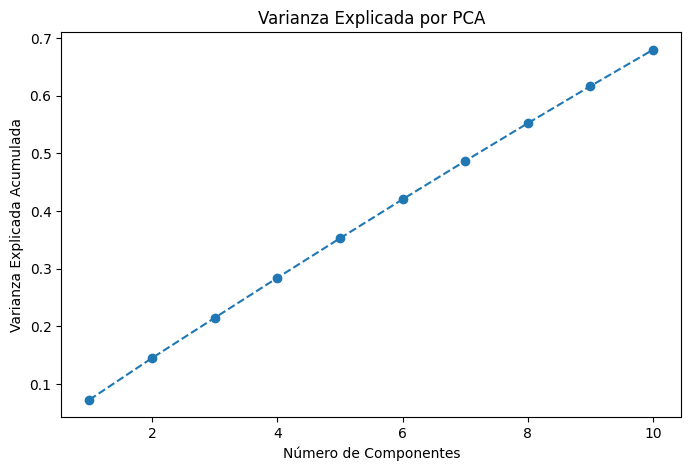

In [261]:
from sklearn.decomposition import PCA

# Aplicamos PCA para reducir la dimensionalidad
pca = PCA(n_components=10)  # Seleccionamos 10 componentes principales
principal_components = pca.fit_transform(df[selected_features])

# Convertimos los componentes principales en un DataFrame
df_pca = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(10)])
df_pca['Diagnosis'] = df['Diagnosis']

# Visualizamos la varianza explicada por cada componente
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Varianza Explicada por PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.show()

## Entrenamiento de modelos de ML
Una vez preprocesados los datos, se procede a entrenar distintos modelos de Machine Learning para realizar predicciones.

###  División del Conjunto de Datos  
Antes de entrenar los modelos, se separa el dataset en dos subconjuntos:  

- **Conjunto de entrenamiento (`X_train, y_train`)** → Se usa para ajustar el modelo.  
- **Conjunto de prueba (`X_test, y_test`)** → Se usa para evaluar el rendimiento del modelo.  

In [262]:
#Separamaos las columnas de características y la columna objetivo
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [263]:
# Actualizamos X_train y X_test con las características seleccionadas
X_train = X_train[selected_features]
X_test = X_test[selected_features]

/tmp/ipykernel_17563/1827888448.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")
/tmp/ipykernel_17563/1827888448.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")
/tmp/ipykernel_17563/1827888448.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="viridis")


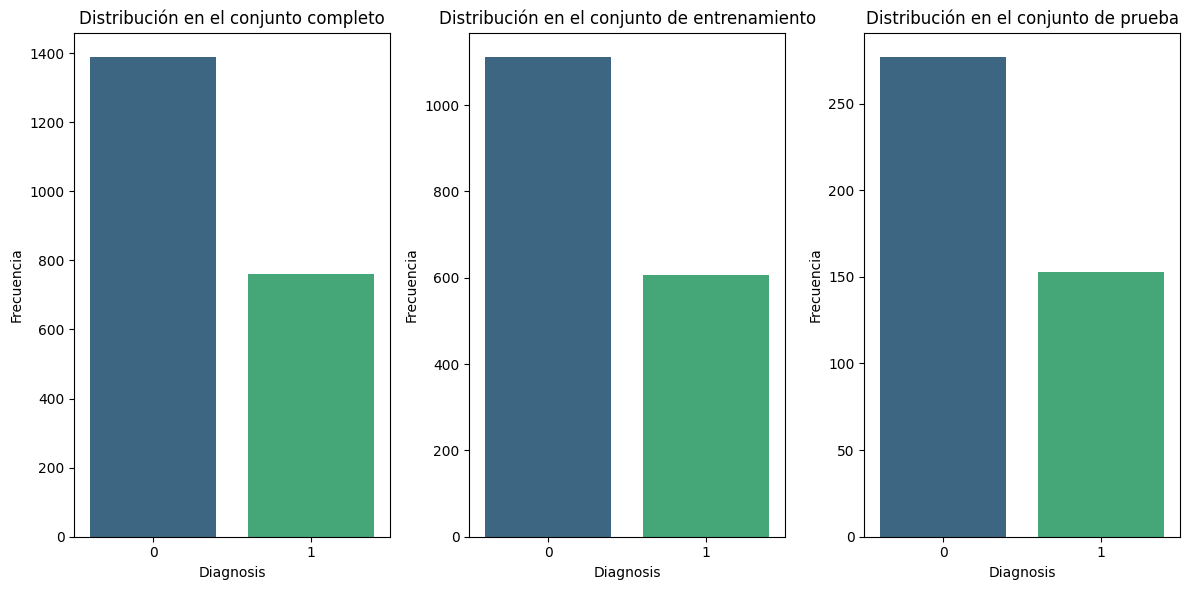

In [264]:
plt.figure(figsize=(12, 6))

# Distribución en el conjunto completo
plt.subplot(1, 3, 1)
sns.countplot(x=y, palette="viridis")
plt.title("Distribución en el conjunto completo")
plt.xlabel("Diagnosis")
plt.ylabel("Frecuencia")

# Distribución en el conjunto de entrenamiento
plt.subplot(1, 3, 2)
sns.countplot(x=y_train, palette="viridis")
plt.title("Distribución en el conjunto de entrenamiento")
plt.xlabel("Diagnosis")
plt.ylabel("Frecuencia")

# Distribución en el conjunto de prueba
plt.subplot(1, 3, 3)
sns.countplot(x=y_test, palette="viridis")
plt.title("Distribución en el conjunto de prueba")
plt.xlabel("Diagnosis")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Modelos

### Modelo de Árbol de decision

In [265]:
# Definimos los hiperparámetros a buscar
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configuramos el GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Entrenamos el modelo con la búsqueda de hiperparámetros
grid_search_dt.fit(X_train, y_train)

# Mostramos los mejores parámetros y el mejor puntaje
print("Mejores parámetros:", grid_search_dt.best_params_)
print("Mejor puntaje:", grid_search_dt.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


Mejores parámetros: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mejor puntaje: 0.9418197843921622


In [266]:
#Entrenamos un modelo de árbol de decisión
dt = DecisionTreeClassifier(max_depth=5,min_samples_leaf=2, min_samples_split=10)
dt.fit(X_train, y_train)

print(classification_report(y_test, dt.predict(X_test)))


              precision    recall  f1-score   support

           0       0.93      0.96      0.95       277
           1       0.93      0.87      0.90       153

    accuracy                           0.93       430
   macro avg       0.93      0.92      0.92       430
weighted avg       0.93      0.93      0.93       430



In [267]:
from sklearn.model_selection import cross_val_score

# Realizamos la validación cruzada
cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')

# Mostramos los resultados
print("Puntajes de validación cruzada:", cv_scores)
print("Precisión promedio:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())

Puntajes de validación cruzada: [0.9244186  0.9622093  0.95930233 0.93895349 0.9271137 ]
Precisión promedio: 0.9423994847108279
Desviación estándar: 0.015792257444209836


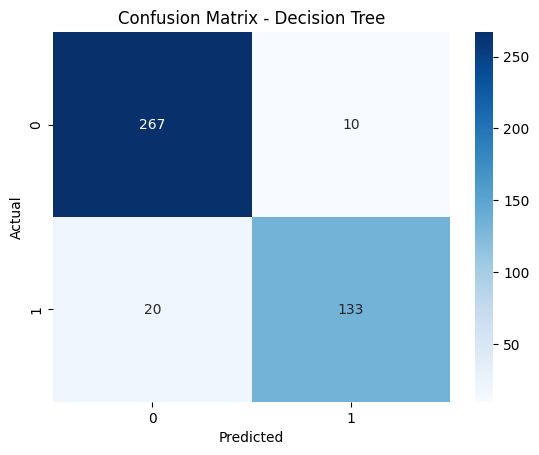

In [268]:
from sklearn.metrics import confusion_matrix

# Generamos la tabla de confusión
conf_matrix = confusion_matrix(y_test, dt.predict(X_test))

# Mostramos la tabla de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

### Modelo de bosque aleatorio

In [269]:
# Definimos los hiperparámetros a buscar
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configuramos el GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Entrenamos el modelo con la búsqueda de hiperparámetros
grid_search_rf.fit(X_train, y_train)

# Mostramos los mejores parámetros y el mejor puntaje
print("Mejores parámetros:", grid_search_rf.best_params_)
print("Mejor puntaje:", grid_search_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejor puntaje: 0.944141975727168


In [270]:
#Entrenamos un modelo de bosque aleatorio
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.97      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.96      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



In [271]:
# Realizamos la validación cruzada
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Mostramos los resultados
print("Puntajes de validación cruzada:", cv_scores)
print("Precisión promedio:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())

Puntajes de validación cruzada: [0.93023256 0.96511628 0.9622093  0.93895349 0.92419825]
Precisión promedio: 0.944141975727168
Desviación estándar: 0.016640277381041853


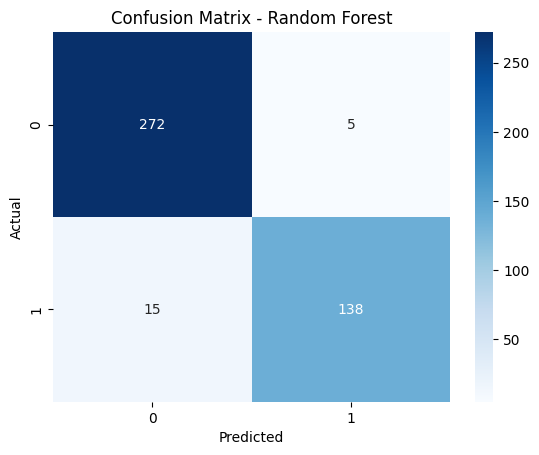

In [272]:
from sklearn.metrics import confusion_matrix

# Generamos la tabla de confusión para el modelo de bosque aleatorio
conf_matrix_rf = confusion_matrix(y_test, rf.predict(X_test))

# Mostramos la tabla de confusión
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Modelo KNN

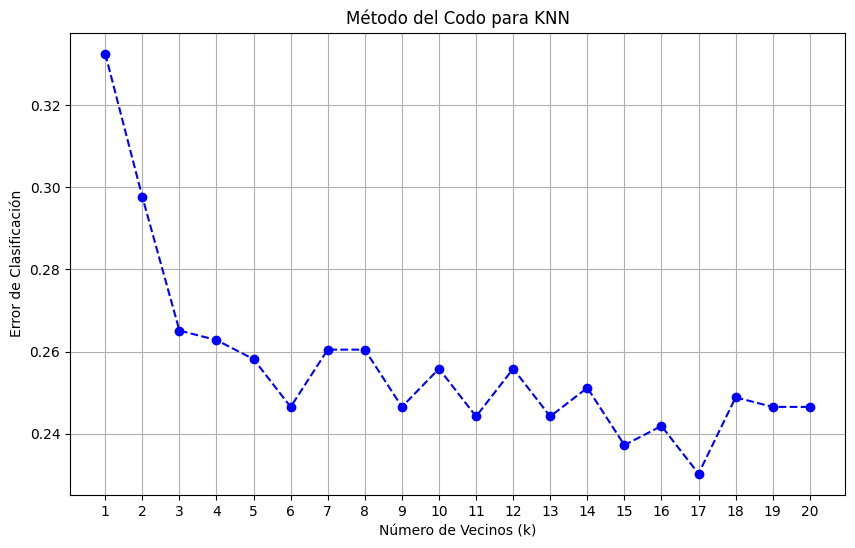

In [273]:
from sklearn.metrics import silhouette_score

# Lista para almacenar las puntuaciones de error cuadrático medio
errors = []

# Probar diferentes valores de k
k_values = range(1, 21)
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    errors.append(1 - knn_temp.score(X_test, y_test))  # Error de clasificación

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', linestyle='--', color='b')
plt.title('Método del Codo para KNN')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Error de Clasificación')
plt.xticks(k_values)
plt.grid()
plt.show()

In [274]:
#Entrenamos un modelo de vecinos más cercanos
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       277
           1       0.79      0.48      0.60       153

    accuracy                           0.77       430
   macro avg       0.78      0.71      0.72       430
weighted avg       0.77      0.77      0.75       430



In [275]:
# Realizamos la validación cruzada
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

# Mostramos los resultados
print("Puntajes de validación cruzada:", cv_scores)
print("Precisión promedio:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())

Puntajes de validación cruzada: [0.79069767 0.7877907  0.79069767 0.7877907  0.7638484 ]
Precisión promedio: 0.7841650281375008
Desviación estándar: 0.010241166096539701


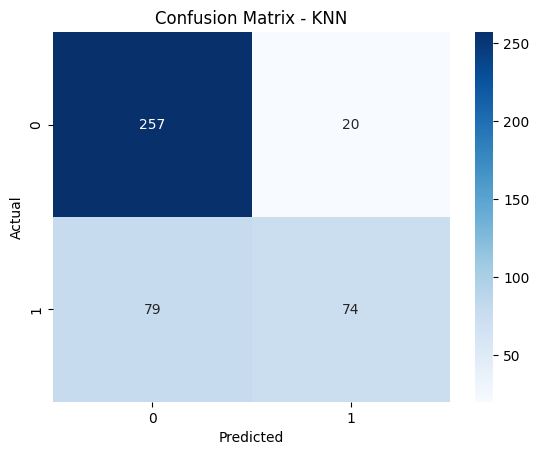

In [276]:
# Generamos la matriz de confusión para el modelo KNN
conf_matrix_knn = confusion_matrix(y_test, knn.predict(X_test))

# Mostramos la matriz de confusión
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

### Modelo de Regresión Logistica

In [277]:
#Entrenamos un modelo de regresión logística
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       277
           1       0.80      0.73      0.76       153

    accuracy                           0.84       430
   macro avg       0.83      0.82      0.82       430
weighted avg       0.84      0.84      0.84       430



In [278]:
# Realizamos la validación cruzada
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')

# Mostramos los resultados
print("Puntajes de validación cruzada:", cv_scores)
print("Precisión promedio:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())

Puntajes de validación cruzada: [0.81976744 0.84302326 0.87790698 0.86337209 0.82507289]
Precisión promedio: 0.8458285307478473
Desviación estándar: 0.022156940099464555


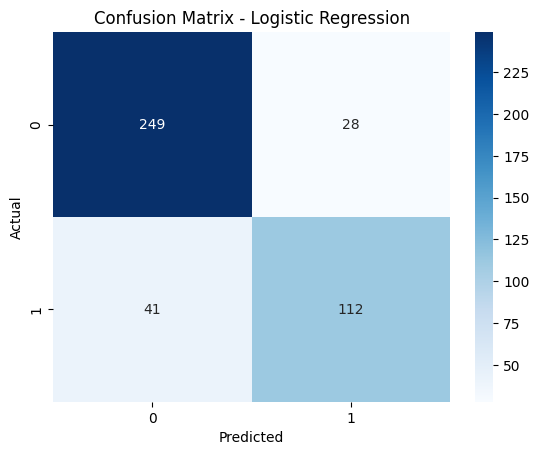

In [279]:
# Generamos la matriz de confusión para el modelo de regresión logística
conf_matrix_lr = confusion_matrix(y_test, lr.predict(X_test))

# Mostramos la matriz de confusión
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Modelo de Support Vector Machine

In [280]:
# Definimos los hiperparámetros a buscar
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Configuramos el GridSearchCV
grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Entrenamos el modelo con la búsqueda de hiperparámetros
grid_search_svc.fit(X_train, y_train)

# Mostramos los mejores parámetros y el mejor puntaje
print("Mejores parámetros:", grid_search_svc.best_params_)
print("Mejor puntaje:", grid_search_svc.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Mejores parámetros: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mejor puntaje: 0.8656095328496847


In [281]:
#Entrenamos un modelo de máquinas de vectores de soporte
svc = SVC(kernel='rbf', gamma=0.01,C=10)
svc.fit(X_train, y_train)

print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       277
           1       0.82      0.75      0.78       153

    accuracy                           0.85       430
   macro avg       0.84      0.83      0.83       430
weighted avg       0.85      0.85      0.85       430



In [282]:
# Realizamos la validación cruzada
cv_scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')

# Mostramos los resultados
print("Puntajes de validación cruzada:", cv_scores)
print("Precisión promedio:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())

Puntajes de validación cruzada: [0.81104651 0.89825581 0.87790698 0.89244186 0.8483965 ]
Precisión promedio: 0.8656095328496847
Desviación estándar: 0.032281240174620175


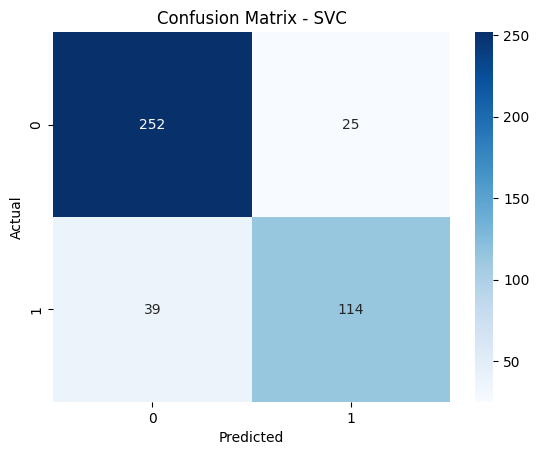

In [283]:
# Generamos la matriz de confusión para el modelo deseado (por ejemplo, SVC)
conf_matrix_svc = confusion_matrix(y_test, svc.predict(X_test))

# Mostramos la matriz de confusión
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
plt.show()

### Red neuronal

In [284]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Definimos el modelo de red neuronal
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa oculta 1
    Dense(32, activation='relu'),  # Capa oculta 2
    Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilamos el modelo
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/home/sauro/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [285]:
# Entrenamos el modelo
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5978 - loss: 0.6538 - val_accuracy: 0.6890 - val_loss: 0.5945
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7666 - loss: 0.5145 - val_accuracy: 0.7297 - val_loss: 0.5272
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8348 - loss: 0.4237 - val_accuracy: 0.7674 - val_loss: 0.4886
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8376 - loss: 0.3971 - val_accuracy: 0.7703 - val_loss: 0.4676
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8526 - loss: 0.3642 - val_accuracy: 0.7674 - val_loss: 0.4570
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8777 - loss: 0.3475 - val_accuracy: 0.7878 - val_loss: 0.4408
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8720 - loss: 0.3243 - val_accuracy: 0.8023 - val_loss: 0.4348
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8771 - loss: 0.3128 - val_accuracy: 0.7994 -

In [286]:
# Evaluamos el modelo
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_nn))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       277
           1       0.76      0.75      0.76       153

    accuracy                           0.83       430
   macro avg       0.81      0.81      0.81       430
weighted avg       0.83      0.83      0.83       430



In [287]:
nn_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,797 (38.27 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,532 (25.52 KB)

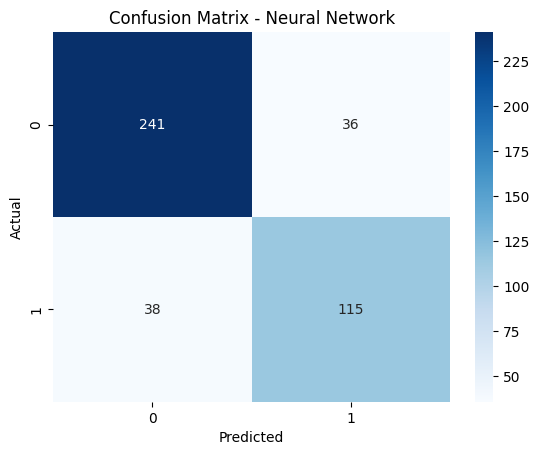

In [288]:
# Generamos la matriz de confusión
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

# Mostramos la matriz de confusión
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()